# TC03 - Proyecto de Machine Learning

---

Erika Michelle Cerdas Mejías - 2022138199 /
Frankmin Feng Zhong - 2022089248 / Dilan Andrey Moya Solano - 2021048309

## Entendimiento del negocio

### Contexto
Como parte de sus labores el Banco Interamericano de Desarrollo busca brindar opciones de financiamiento y soluciones para el desarrollo social, económico e institucional de America Latina y el Caribe, una de estas soluciones corresponde a los programas de ayudas sociales. Estos programas tienen dificultad al momento de escoger de forma correcta a las familias de los sectores mas pobres de la población, ya que por su condición económica no pueden brindar la informacion necesaria para poder participar dentro de estos programas.

En la actualizad se hace uso de un algoritmo que permite verificar si una familia puede clasificar para estos programas. Este algoritmo llamado PMT, toma en cuenta ciertos atributos observables de un hogar para clasificar las necesidades de este hogar. Lamentablemente conforme la población crece y la pobreza disminuye, la precisión de este algoritmo disminuye. Debido a esto se nos solicita la tarea de mejorar el rendimiento del PMT a través del uso del machine learning.

### Objetivos del negocio

A partir de la informacion anterior se determinaron los siguientes objetivos del negocio:
* Optimizar la repartición de ayudas sociales, para que estas alcancen a familias de pocos recursos.
* Permitir la implementación de nuevas herramientas para la clasificación de familias a programas de ayudas sociales

### Criterios de exito del negocio

A partir de los objetivos anteriores se definieron los criterios de exito para este proyecto:
* Se logra una distribucion justa de las ayudas sociales a familias de bajos recursos.
*	Se obtiene un modelo que puede ser utilizado en otros países.

### Objetivo de la mineria de datos

A partir de los objetivos del negocio se elaboraron los siguientes objetivos en el area de la mineria de datos:

*	Desarrollar un modelo de aprendizaje automático, que utilice los datos provistos para mejorar la precisión del algoritmo.
*	Entrenar un modelo de clasificación a partir de datos de hogares costarricenses que pueda ser generalizado a otros países, evitando el overfitting.

### Criterios de exito de la mineria de datos

Y se obtuvieron los siguientes criterios de éxito:
*	 El modelo desarrollado debe alcanzar un valor de al menos 0.50 (50%) en las métricas clave (precisión, recall, F1-score).
*	Se obtiene un modelo que es capaz de generalizarse a un conjunto de datos distinto a los datos de entrenamiento.




## Entendimiento de los datos

### Fuentes de los datos
Para llevar a cabo el entrenamiento del modelo, se nos brindó un dataset con las características de los hogares costarricenses para clasificarlos en su nivel de pobreza. Para poder acceder a este dataset puede hacer uso del siguiente enlace: [Costa Rican Household Poverty Level Prediction | Kaggle](https://www.kaggle.com/competitions/costa-rican-household-poverty-prediction/data)

### Descripcion de los datos
Como es usual en los datasets para aprendizaje automático se nos brindan dos archivos de valores separados por comas (CSV) para realizar el entrenamiento (train.csv) y para probar nuestros modelos (test.csv). En el caso de train.csv contamos con 9557 entradas, mientras que en test.csv contamos con 23857 entradas. Cada una de las entradas representa a una persona y un hogar puede estar compuesto por varias personas. Cada entrada de este dataset está compuesta de 142 variables indicando características tanto de la persona, como su nivel de escolaridad, nivel de educación y estado civil, como información del hogar, como el estado de las paredes, material del piso, total de personas en el hogar y tamaño. Los tipos de las variables se dividen en dos grandes categorías: numéricas y booleanas, además de una variable de tipo cadena para indicar el id único de la persona.



### Exploracion de datos
Para iniciar con la exploracion de los datos se procede a cargar el dataset usando pandas. Primero importamos las librerias que consideramos necesarias para poder llevar a cabo el proyecto.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler


Despues cargamos los datos para el entrenamiento de los modelos a traves de la funcion read_csv de pandas, y revisamos si la carga se hizo correctamente.

In [6]:
train = pd.read_csv('train.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [ ]:
print(train.columns)
train.shape

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)


(9557, 143)

In [ ]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


Despues vamos a analizar algunas de las variables del dataset con el fin de encontrar informacion util para entrenar nuestros modelos. Primero revisaremos la variable target.

La variable target se utiliza para indicar a que grupo pertenece un hogar costarricense. Para esta variable se cuenta con los siguientes valores:
1. Hogar en extrema pobreza
2. Hogar con pobreza media
3. Hogar vulnerable
4. Hogar no vulnerable

El siguiente grafico nos permite determinar el numero de personas que pertenece a cada tipo de hogar.

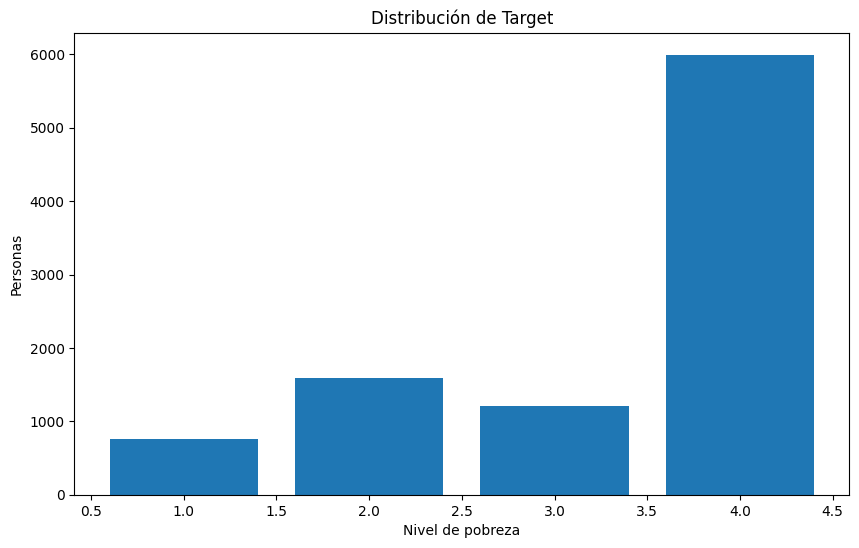

In [ ]:
targetData = train.groupby('Target').size()
fig = plt.figure(figsize=(10, 6))
plt.bar(targetData.index, targetData.values)
plt.xlabel('Nivel de pobreza')
plt.ylabel('Personas')
plt.title('Distribución de Target')
plt.show()


Parte de los requerimientos de nuestro modelo es que se deben clasificar unicamente por hogar y no por persona. El siguiente grafico corresponde al numero de hogares por target. Para ello se utiliza una de las variables de nuestros datos llamada parentesco1, que indica si una persona es jefe de hogar.


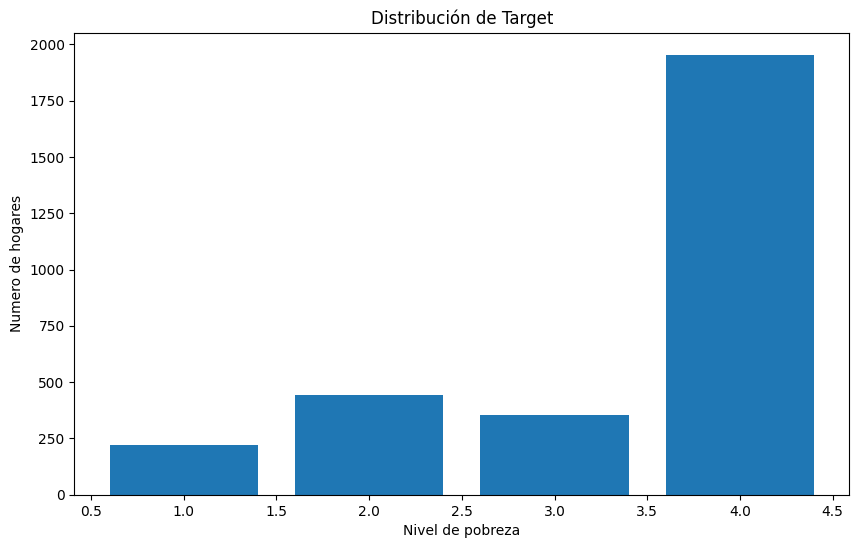

In [ ]:
jefesHogar = train.loc[train["parentesco1"]==1]
targetJefes = jefesHogar.groupby('Target').size()
fig = plt.figure(figsize=(10, 6))
plt.bar(targetJefes.index, targetJefes.values)
plt.xlabel('Nivel de pobreza')
plt.ylabel('Numero de hogares')
plt.title('Distribución de Target')
plt.show()

Dentro de las variables de nuestro dataset se encuentra las variables tipoVivi, de tipo binarias que nos indican el tipo de vivienda, clasificandolo en las siguientes categorias:

1.   Hogar propio ya pagado
2.   Hogar propio, pero que no se ha terminado de pagar
3.   Hogar alquilado
4.   Vive en un precario
4.   Otros (Asignado o prestado)

A continuacion se presenta un grafico de barras que indica la cantidad de hogares que pertenecen a cada valor de target, por cada tipo de vivienda.


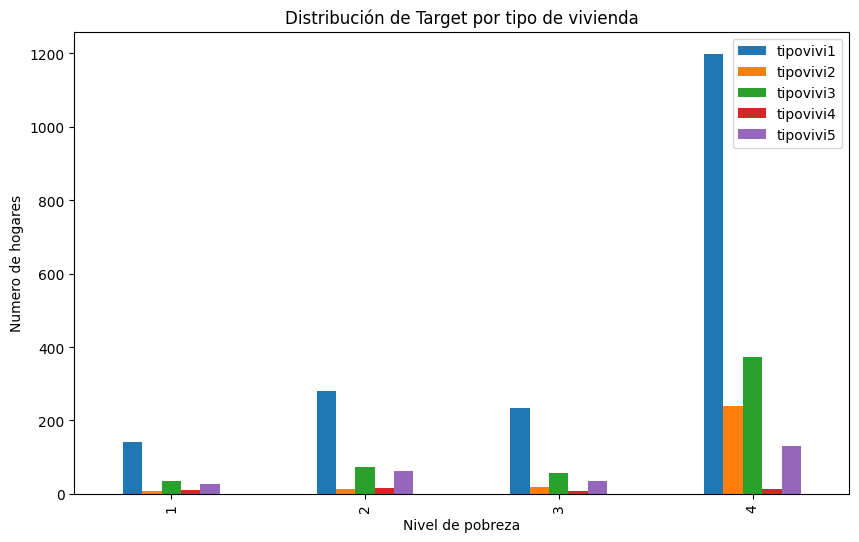

In [ ]:
targetByVivienda = jefesHogar[['Target', 'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']].groupby('Target').sum()
targetByVivienda.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Nivel de pobreza')
plt.ylabel('Numero de hogares')
plt.title('Distribución de Target por tipo de vivienda')
plt.legend(loc='upper right')
plt.show()


Otra de las variables a considerar dentro de nuestro dataset corresponde a las variables instLevel#, de tipo binarias que determinan el maximo nivel de educacion alcanzado por una persona. Entre menor sea el numero de la variable, menor sera el nivel de educacion.

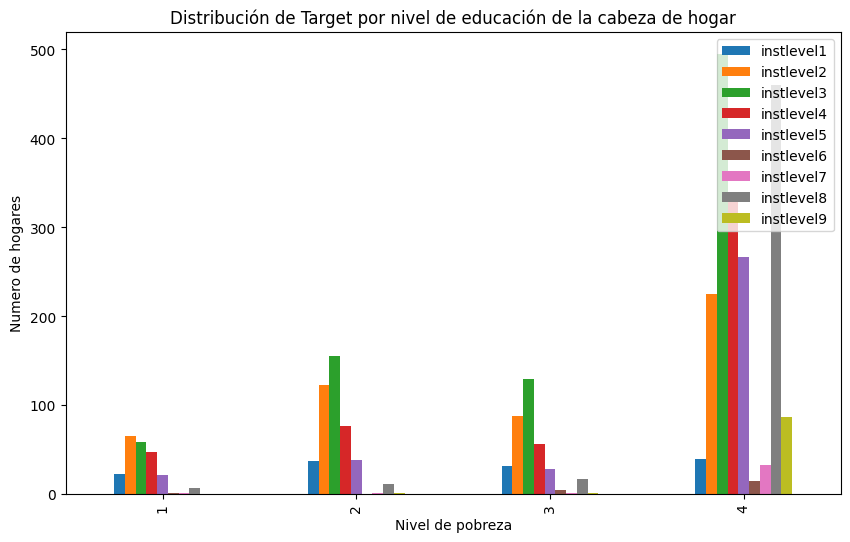

In [ ]:
targetByEducation = jefesHogar[['Target', 'instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9']].groupby('Target').sum()
targetByEducation.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Nivel de pobreza')
plt.ylabel('Numero de hogares')
plt.title('Distribución de Target por nivel de educación de la cabeza de hogar')
plt.legend(loc='upper right')
plt.show()

Por ultimo otra de las variables a considerar corresponde a lugar#, las cuales representan una region especifica dentro del pais.

A continuacion se presenta un grafico de barras que indica la cantidad de hogares que pertenecen a cada valor de target, por cada region.

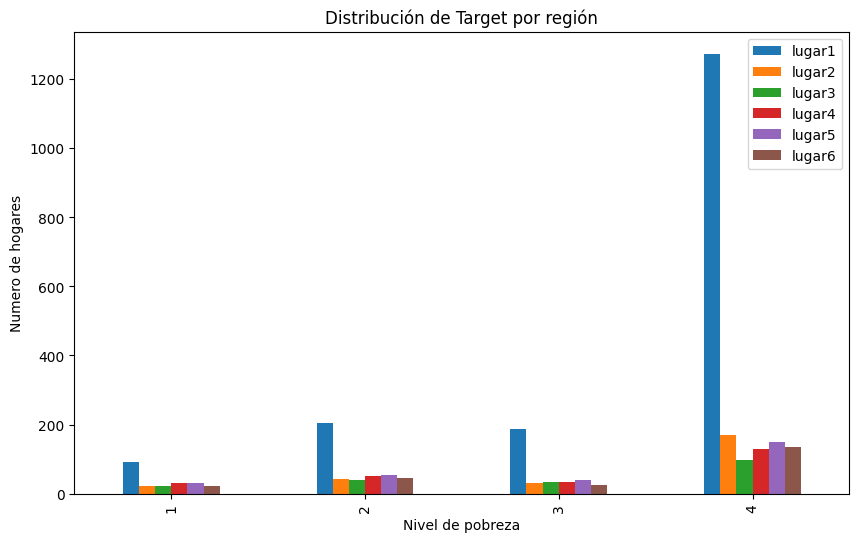

In [ ]:
targetByRegion = jefesHogar[['Target', 'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6']].groupby('Target').sum()
targetByRegion.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Nivel de pobreza')
plt.ylabel('Numero de hogares')
plt.title('Distribución de Target por región')
plt.legend(loc='upper right')
plt.show()

### Calidad de los datos
A continuacion vamos a realizar una evaluacion preliminar de los datos del dataset. Primero revisaremos si tenemos datos perdidos dentro de nuestro dataset, para ello usaremos la funcion de pandas isnull, que nos permite obtener los valores nulos del dataset.


In [ ]:
#Analizar datos faltantes
missing_values = train.isnull().sum()
print(missing_values[missing_values > 0])

v2a1         6860
v18q1        7342
rez_esc      7928
meaneduc        5
SQBmeaned       5
dtype: int64


Aqui podemos observar que en nuestro dataset tenemos bastantes datos nulos. ¿Pero a que corresponden estos datos nulos? En la siguiente tabla se incluyen las variables junto con una pequeña descripcion de ellas.

variable | descripcion
--- | ---
v2a1 | Pago mensual de la renta
v18q1 | Numero de tablets presente en una casa
rez_esc | Años de resago de un estudiante
meaneduc | Años promedio de educacion para los adultos
SQBmeaned | La media cuadratica

#### v2a1

En el caso de la primera variable vamos a revisar si las personas con el valor nulo viven en un hogar de alquiler.


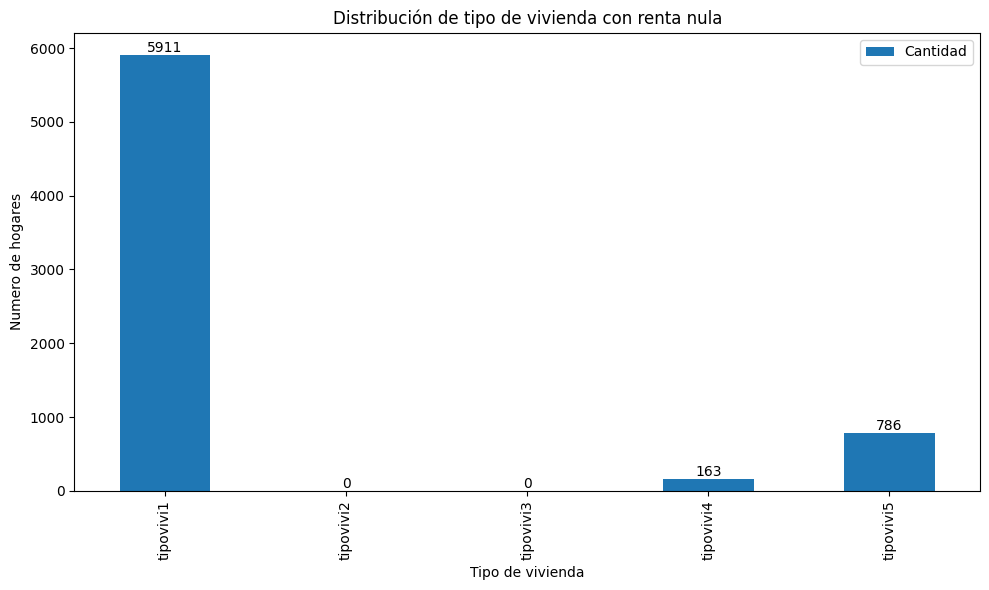

In [7]:
nullRenta = train[train['v2a1'].isnull()]
dataForDiagram = nullRenta[['tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5']].sum()

ax = dataForDiagram.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Tipo de vivienda')
plt.ylabel('Numero de hogares')
plt.title('Distribución de tipo de vivienda con renta nula')

# Add labels to the bars
for i, v in enumerate(dataForDiagram):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Add legend with a meaningful label
plt.legend(['Cantidad'], loc='upper right')

plt.tight_layout()
plt.show()




Como podemos ver la mayoria de datos nulos en esta categoria corresponden a familias que viven en un hogar propio, mientras que el resto se distribuyen en hogares precarios y de hogares prestados o asignados.

#### v18q1
Esta variable corresponde al numero de tablets que un hogar tiene. Esta varible se relaciona con otras de las variables de nuestro dataset, la variable v18q, que nos indica si un hogar cuenta con una tablet. Vamos a revisar si las personas con un valor nulo en v18q1, tienen tablets en sus hogares.

In [ ]:
nullTablets = train[train['v18q1'].isnull()]
nullTablets[nullTablets['v18q'] == 0].shape


(7342, 143)

Como podemos ver cada persona con un valor nulo en la cantudad de tablets, no posee una tablet en su casa. Debido a esto es necesario colocar un valor de 0 en cada uno de los valores nulos de la variable.

#### rez_esc
De acuerdo con la informacion de las variables del dataset, esta caracteristica corresponde a la diferencia entre los años de educacion que la persona debe tener y los años de educacion que la persona tiene. De acuerdo con la pagina de discusion del dataset este valor solo se recoge en personas mayores de 7 años y menores a 19 años, por lo cual debemos revisar que esta afirmacion sea correcta. Asi que tomaremos el dataset y revisaremos cuantas personas pertenecen a este rango y cuantas no, cuando rez_esc es diferente a nulo.

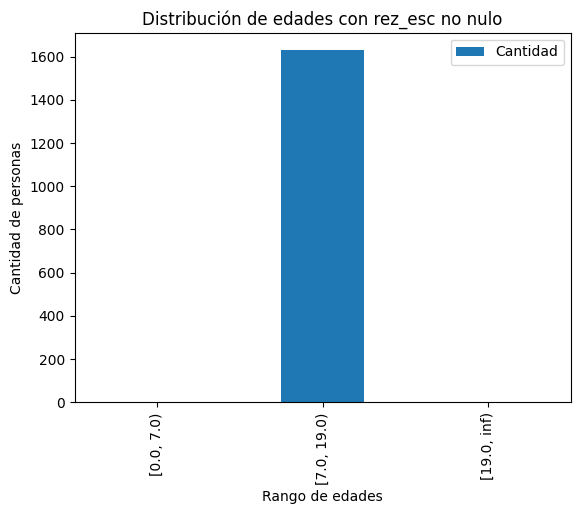

In [9]:
rezNotNull = train[train['rez_esc'].notnull()].copy(deep=True)

# Usamos 6 para poder contar a las personas con 7 años
bins = [0, 7, 19, float('inf')]
rezNotNull['intervalosEdad'] = pd.cut(rezNotNull['age'], bins=bins, right=False)

# Usamos observed=False para evitar la advertencia futura
rezNotNull.groupby('intervalosEdad', observed=False)['Id'].count().reset_index(name='Cantidad').plot(kind='bar', x='intervalosEdad', y='Cantidad')

# Etiquetas y título del gráfico
plt.xlabel('Rango de edades')
plt.ylabel('Cantidad de personas')
plt.title('Distribución de edades con rez_esc no nulo')

# Mostramos el gráfico
plt.show()

En este caso podemos observar como los valores no nulos se encuentran dentro de las edades 7 y 19. Ahora revisaremos los valores nulos.

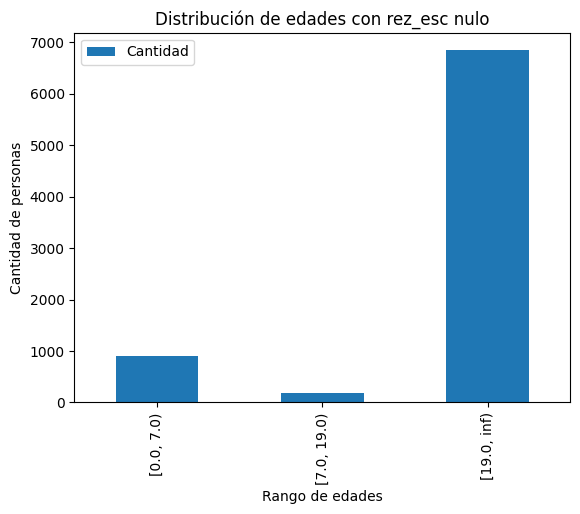

In [10]:
rezNull = train[train['rez_esc'].isnull()].copy(deep=True)

# Usamos los mismos bins que antes
bins = [0, 7, 19, float('inf')]
rezNull['intervalosEdad'] = pd.cut(rezNull['age'], bins=bins, right=False)

# Usamos observed=False para evitar la advertencia futura
rezNull.groupby('intervalosEdad', observed=False)['Id'].count().reset_index(name='Cantidad').plot(kind='bar', x='intervalosEdad', y='Cantidad')

# Etiquetas y título del gráfico
plt.xlabel('Rango de edades')
plt.ylabel('Cantidad de personas')
plt.title('Distribución de edades con rez_esc nulo')

# Mostramos el gráfico
plt.show()

Aqui podemos ver como en el caso de los valores nulos, la mayoria de estos se encuentran fuera del rango de edad de la variable. Debido a esto se colocara un valor de 0 en los datos de las personas menores de 7 años y mayores de 19 años, mientras que en el caso de las personas con edades entre 7 y 19 años se colocara la media correspondiente a la edad.

#### meaneduc y SQBmeaned
Esta variable representa el numero promedio de años de educacion de un adulto. Primero revisaremos la relacion entre las variables de escolari, rez_esc y SQBmeaned con meaneduc.

In [ ]:
meanEduNotNull = train[train['meaneduc'].notnull()]
meanEduNotNull[['age', 'escolari', 'rez_esc', 'meaneduc', 'SQBmeaned']].head()


,age,escolari,rez_esc,meaneduc,SQBmeaned
0,43,10,NaN,10.0,100.0
1,67,12,NaN,12.0,144.0
2,92,11,NaN,11.0,121.0
3,17,9,1.0,11.0,121.0
4,37,11,NaN,11.0,121.0


En este caso podemos observar como la variable meaneduc toma el valor del nivel de escolaridad, siempre y cuando el valor de rez_esc sea nulo. Tambien vemos como SQBmeaned equivale al cuadrado de meaneduc.

Ahora revisamos la relacion de estas variables en los datos con meaneduc nulos.

In [ ]:
meanEduNull = train[train['meaneduc'].isnull()]
meanEduNull[['age', 'escolari', 'rez_esc', 'meaneduc', 'SQBmeaned'] ]

,age,escolari,rez_esc,meaneduc,SQBmeaned
1291,18,10,NaN,NaN,NaN
1840,18,6,NaN,NaN,NaN
1841,18,4,NaN,NaN,NaN
2049,19,12,NaN,NaN,NaN
2050,19,12,NaN,NaN,NaN


Podemos ver que en los 5 registros donde meaneduc es nulo, las variables rez_esc y SQBmeaned tambien tienen valores nulos. En este caso nuestra solucion implicaria tomar el valor de la escolaridad, asignarselo a meaneduc y calcular el cuadrado de meaneduc. Como las edades de las personas sobrepasan los 17 años, el valor de rez_esc se mantiene en cero.

## Preparación de los datos

### Seleccion de los datos
Como se menciono anteriormente, nuestro dataset contiene un numero considerable de columnas, 142 columnas para ser especificos. Al contar con un numero muy grande de columnas, nuestros modelos pueden sobreajustarse a los datos, reduciendo su rendimiento, y en el peor de los casos, que nuestros modelos no se generalizen de forma correcta. Por ello hemos seleccionado un numero especifico de variables que seran tomadas en cuenta al momento de entrenar nuestros modelos. Cabe mencionar que para facilitar su manejo se les asignara un nombre mas significativo. A continuacion se incluye el listado de ellas.

Nombre Original | Nombre Nuevo
---|---
v2a1 | Monthly_Rent_Payment
rooms | Total_Rooms
overcrowding | Person_Per_Room
area2 | Rural
r4h3 | Total_Males
r4m3 | Total_Females
estadocivil3 | Married
dependency | Dependency
escolari | Years_Schooling
rez_esc | Years_Behind_School
meaneduc | Mean_Education
instlevel1 | No_Education
instlevel2 | IncompletePrimary
instlevel3 | CompletePrimary
instlevel4 | IncompleteSecondary
instlevel5 | CompleteSecondary
instlevel6 | TechnicalIncompleteSecondary
instlevel7 | TechnicalCompleteSecondary
instlevel8 | HigherEducation
instlevel9 | Postgraduate
tipovivi1 | Fully_Paid_House
tipovivi2 | Paying_In_Installments
tipovivi3 | Rented
tipovivi4 | Precarious
tipovivi5 | Assigned/Borrowed
lugar1 | Central
lugar2 | Chorotega
lugar3 | PacificoCentral
lugar4 | Brunca
lugar5 | HuetarAtl
lugar6 | HuetarNor

Tambien se incluye la variable correspondiente a la edad para realizar la limpieza de los datos.

Como los objetivos de nuestro proyecto es estimar si un hogar se encuentra en pobreza o no, se decidio tomar en cuenta unicamente aquellos datos del dataset que corresponden al jefe de hogar.

In [ ]:
#Solo se eligirá los jefes del hogar para no repetir datos
train = train[train['parentesco1'] == 1].copy()

#Estas serán las variables a usar para el modelo
selected_columns = [
    "v2a1", "rooms","overcrowding", "area2",
    "r4h3", "r4m3", "estadocivil3", "dependency",
    "escolari", "rez_esc", "meaneduc",
    'instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 'instlevel9',
    'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5',
    'lugar1', 'lugar2', 'lugar3', 'lugar4', 'lugar5', 'lugar6','age',
    "Target"
]

#Se seleccionan solo las tablas que se quieren
train = train[selected_columns].copy()

#Se renombran las columnas por cuestion de visibilidad
train.columns = [
    "Monthly_Rent_Payment", "Total_Rooms", "Person_Per_Room", "Rural",
    "Total_Males", "Total_Females", "Married",  "Dependency",
    "Years_Schooling", "Years_Behind_School", "Mean_Education",
    'No_Education', 'IncompletePrimary', 'CompletePrimary', 'IncompleteSecondary ', 'CompleteSecondary', 'TechnicalIncompleteSecondary', 'TechnicalCompleteSecondary', 'HigherEducation', 'Postgraduate ',
    'Fully_Paid_House', 'Paying_In_Installments', 'Rented', 'Precarious', 'Assigned/Borrowed',
    'Central', 'Chorotega', 'PacificoCentral', 'Brunca', 'HuetarAtl', 'HuetarNor','Age',
    "Target"
]

train.head()

,Monthly_Rent_Payment,Total_Rooms,Person_Per_Room,Rural,Total_Males,Total_Females,Married,Dependency,Years_Schooling,Years_Behind_School,...,Precarious,Assigned/Borrowed,Central,Chorotega,PacificoCentral,Brunca,HuetarAtl,HuetarNor,Age,Target
0,190000.0,3,1.000000,0,1,0,0,no,10,NaN,...,0,0,1,0,0,0,0,0,43,4
1,135000.0,4,1.000000,0,1,0,0,8,12,NaN,...,0,0,1,0,0,0,0,0,67,4
2,NaN,8,0.500000,0,0,1,0,8,11,NaN,...,0,0,1,0,0,0,0,0,92,4
5,180000.0,5,1.333333,0,2,2,0,yes,11,NaN,...,0,0,1,0,0,0,0,0,38,4
8,130000.0,2,4.000000,0,1,3,0,yes,9,NaN,...,0,0,1,0,0,0,0,0,30,4


### Limpieza de los datos
Una vez ya seleccionados las variables y datos a utilizar procedemos a realizar la limpieza de estos. Primero se revisara si dentro de este subconjunto de los datos tenemos valores nulos usando las funciones de pandas.

In [ ]:
#Analizar datos faltantes
missing_values = train.isnull().sum()
print(missing_values[missing_values > 0])

Monthly_Rent_Payment    2156
Years_Behind_School     2972
Mean_Education             3
dtype: int64


Podemos ver que existe un numero considerable de datos faltantes. Vemos que los datos faltantes son el pago mensual de renta, los años de rezago de un estudiante y la educacion media del jefe de hogar.

In [ ]:
#Se va a leer las columnas que tienen datos incompletos
selected_columns = ['Monthly_Rent_Payment', 'Years_Behind_School', 'Mean_Education']
train.loc[:, selected_columns]

,Monthly_Rent_Payment,Years_Behind_School,Mean_Education
0,190000.0,NaN,10.00
1,135000.0,NaN,12.00
2,NaN,NaN,11.00
5,180000.0,NaN,11.00
8,130000.0,NaN,10.00
...,...,...,...
9535,NaN,NaN,4.50
9541,NaN,NaN,4.00
9545,46500.0,NaN,10.00
9551,NaN,NaN,3.00


Para poder eliminar los datos faltantes se decidio llevar a cabo varias estrategias:
* En el caso de los hogares propios se le asignara un valor de 0 a la renta, mientras que en los otros tipos de vivienda se colocara la media de la renta.
* En el caso de los años de rezago escolares, si la persona tiene una edad menor a los 7 años o mayor a los 19 años, se le asignara un valor de 0. Esto porque la variable unicamente se calcula para las personas dentro de ese rango de edad. En el caso de las personas dentro de este rango de edad se coloca 0.
* En el caso de la educacion media se colocara el valor de años de educacion de la persona. Esto lo hacemos ya que en los datos hay una tendencia de que esta variable tenga el mismo valor a los años de educacion de la persona.

In [ ]:
#Se va a rellenar los datos con la media en el caso de la renta y el promedio de educación.
#Los hogares que ya fueron pagados deben de tener un valor de 0 en la renta
#Y en el caso de los demas hogares que no pertenecen a la categoria seran llenados con la media.
train.loc[train['Fully_Paid_House']==1, 'Monthly_Rent_Payment'] = 0
train.loc[:, 'Monthly_Rent_Payment'] = train['Monthly_Rent_Payment'].fillna(train['Monthly_Rent_Payment'].median())

#Para años los años atrasados en la educación solo se rellenarán con 0s si la persona es menor a 7 y si es mayor a 19.
train.loc[(train['Age'] < 7) | (train['Age'] >= 19), 'Years_Behind_School'] = 0
#En el caso de las personas entre los 7 y 19 años se les colocara la.
train.loc[:, 'Years_Behind_School'] = train['Years_Behind_School'].fillna(0)
#En la variable de la media de educacion se colocara el valor de los años de educacion,
#ya que en los datos see observo la tendencia de que el valor de Mean_Education sea igual a los años de educacion.
#Se toma en cuenta tambien el hecho de que los valores de Years_Behind_School son cero gracias a la transformacion anterior
train.loc[:, 'Mean_Education'] = train['Mean_Education'].fillna(train['Years_Schooling'])

In [ ]:
#confirmar que no hay datos vacios
missing_values = train.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [ ]:
#Eliminamos la columna para la edad, ya que es una caracteristica necesaria para entrenar nuestros modelos
train = train.drop('Age', axis=1)
train.head()

,Monthly_Rent_Payment,Total_Rooms,Person_Per_Room,Rural,Total_Males,Total_Females,Married,Dependency,Years_Schooling,Years_Behind_School,...,Rented,Precarious,Assigned/Borrowed,Central,Chorotega,PacificoCentral,Brunca,HuetarAtl,HuetarNor,Target
0,190000.0,3,1.000000,0,1,0,0,no,10,0.0,...,1,0,0,1,0,0,0,0,0,4
1,135000.0,4,1.000000,0,1,0,0,8,12,0.0,...,1,0,0,1,0,0,0,0,0,4
2,0.0,8,0.500000,0,0,1,0,8,11,0.0,...,0,0,0,1,0,0,0,0,0,4
5,180000.0,5,1.333333,0,2,2,0,yes,11,0.0,...,1,0,0,1,0,0,0,0,0,4
8,130000.0,2,4.000000,0,1,3,0,yes,9,0.0,...,1,0,0,1,0,0,0,0,0,4


### Construccion y transformacion de los datos.
Para este dataset no consideramos necesario la creacion de nuevos datos per se, sino que se tuvo que realizar transformaciones a ciertas variables del dataset.

La primera corresponde a una simplificacion de los valores de la variable target, colocando un 1 cuando corresponde a un hogar pobre y 0 cuando es un hogar no pobre. La segunda corresponde a una recodificacion a la variable Dependency, pasando de un string para representar el si y el no, por un 1 y un 0 respectivamente.


In [ ]:
#reclafisicar datos
#si pertenece a 1,2,3 = 0 = clase vulnerable
#si pertenece a 4 = 1 = clase no vulnerable
train['Target'] = train['Target'].replace({1: 0, 2: 0, 3: 0, 4: 1})

#cambiar los string de 'no' a 0 y yes a '1'
train[['Dependency']] = train[['Dependency']].replace('no', 0)
train[['Dependency']] = train[['Dependency']].replace('yes', 1)

#se separan en datos de entrenamiento y de testing
train_split = train.sample(frac=0.8, random_state=42)
test_split = train.drop(train_split.index)


In [ ]:
#Instansear el scaler
scaler = StandardScaler()

#Separar el "x" "y" de las variables
x_train = train_split[train_split.columns[:-1]].values
y_train = train_split[train_split.columns[-1]].values

x_test = test_split[test_split.columns[:-1]].values
y_test = test_split[test_split.columns[-1]].values

#Estandarización de datos
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

#Hacer Oversampling a los datos de entrenamiento
ros =RandomOverSampler()
x_train, y_train = ros.fit_resample(x_train,y_train)

## Fase de Modelado

Corresponde a las etapas del entrenamiento y evaluación


Este corresponde a un modelo de clasificación

### Máquina de vectores de soporte

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.77      0.65       192
           1       0.87      0.72      0.79       403

    accuracy                           0.74       595
   macro avg       0.72      0.74      0.72       595
weighted avg       0.77      0.74      0.74       595



### K Nearest Neighbor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.54      0.53       192
           1       0.78      0.76      0.77       403

    accuracy                           0.69       595
   macro avg       0.65      0.65      0.65       595
weighted avg       0.69      0.69      0.69       595



### Árbol de Decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = dtree.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.59      0.55       192
           1       0.79      0.74      0.76       403

    accuracy                           0.69       595
   macro avg       0.66      0.67      0.66       595
weighted avg       0.70      0.69      0.70       595



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.69      0.65       192
           1       0.84      0.79      0.82       403

    accuracy                           0.76       595
   macro avg       0.73      0.74      0.73       595
weighted avg       0.77      0.76      0.76       595



# Cross-Validation Accuracy

In [ ]:
from sklearn.model_selection import cross_val_score

models = [('Máquina de vectores de soporte', svm_model),
          ('Árbol de Decisión', dtree),
          ('Random Forest', rf),
          ('K Nearest Neighbor', knn_model)]

for name, model in models:
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")


Máquina de vectores de soporte Cross-Validation Accuracy: 0.7492 (+/- 0.0198)
Árbol de Decisión Cross-Validation Accuracy: 0.8188 (+/- 0.0382)
Random Forest Cross-Validation Accuracy: 0.8411 (+/- 0.0340)
K Nearest Neighbor Cross-Validation Accuracy: 0.7969 (+/- 0.0448)


#Analisis de las variables usadas en Random Forest


In [ ]:
#Indica la importancia de cada variable con respecto al modelo de Random Forest
gradoImportancia = rf.feature_importances_


df_importancia = pd.DataFrame({
    'Variable': train_split.columns[:-1],
    'GradoImportancia': gradoImportancia
})

# Ordenar el DataFrame por la importancia
df_importancia = df_importancia.sort_values(by='GradoImportancia', ascending=False)
df_importancia.head(3)

,Variable,GradoImportancia
10,Mean_Education,0.182461
7,Dependency,0.111119
2,Person_Per_Room,0.096111


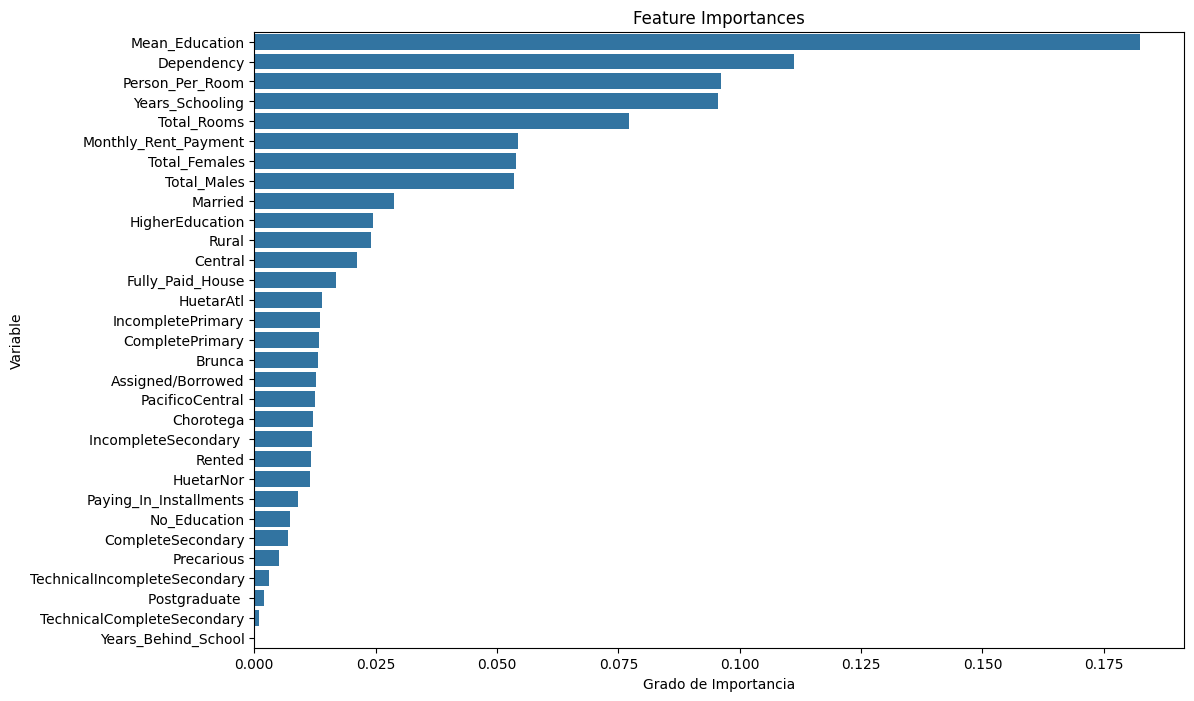

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='GradoImportancia', y='Variable', data=df_importancia)
plt.title('Feature Importances')
plt.xlabel('Grado de Importancia')
plt.ylabel('Variable')
plt.show()

## Criterio de Selección y Conclusiones
Según los objetivos planteados en la sección de Entendimiento del Negocio, uno de los criterios para seleccionar el modelo era su capacidad para reconocer con precisión si una familia era considerada vulnerable. La intención de determinar si una familia pertenecía a esta clase vulnerable era evaluar su elegibilidad para participar en un programa de ayuda social. Basándonos en estos puntos, decidimos seleccionar el modelo de Random Forest, ya que resultó ser el que presentó las mejores métricas en términos de precisión. Este modelo fue el más efectivo para clasificar a las familias vulnerables (Target = 0), alcanzando un valor de precisión de 0.61. Esto significa que, de todas las familias clasificadas como vulnerables, el 61% fueron correctamente identificadas. Además al analizar el grado de importancia de las variables usadas, se pudo determinar que para el modelo de Random Forest, las variables de mayor peso fueron:


1. Años promedio de educación para adultos (18+)
2. Tasa de dependencia
3. Cantidad de personas por habitación


Los años promedio de educación para adultos (18+) fue el mejor predictor para indicar el nivel de pobreza. Esto se podría dar debido a que los hogares con un mayor nivel educativo tienden a tener mejores oportunidades económicas.


Según el Instituto Nacional de Estadística, la tasa de dependencia se refiere al "cociente entre la población perteneciente a un determinado ámbito a 1 de enero de un año concreto menor de 16 años o mayor de 64 entre la población de 16 a 64 años, expresado en tanto por cien"(https://www.ine.es/DEFIne/es/concepto.htm?c=5098). Tiene sentido que las personas con alta nivel de dependencia tengan una alta relación con el nivel de pobreza, puesto que estas personas tienen mayor presión para traer recursos económicos al hogar, aumentando el riesgo de pobreza.

Por último, la cantidad de personas por habitación refleja las condiciones de vivienda y el hacinamiento, donde las familias con mayores niveles de pobreza suelen experimentar altos índices de este indicador.

Otro dato relevante es que, para este modelo, la cantidad de años atrasados en la escuela no parece tener peso alguno en la clasificación de las familias. Para futuros proyectos, se podría considerar la omisión de esta variable.